# Customer Churn Prediction

## Importing libraries

In [54]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler      # for scaling
from imblearn.combine import SMOTETomek               # for oversampling
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# for evaluation metrics
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# for visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# ignoring warnings
import warnings
warnings.filterwarnings('ignore')

## Loading Dataset

In [2]:
df = pd.read_csv("/content/Telco-Customer-Churn.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## Data Preprocessing

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df1 = df.drop('customerID',axis=1)   #'cutomerID' is not useful for predictions
df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df1.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [8]:
#df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

In [9]:
df1[df1.iloc[:,:]==' ']=np.NaN

In [10]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)
df1.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [11]:
df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


**drop NaN values**

In [12]:
df2 = df1.dropna(axis=0)
df2.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [13]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


In [14]:
df2['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [15]:
df2['gender'] = df2['gender'].apply(lambda x: 1 if x == 'Female' else 0)

In [16]:
df2['gender'].unique(), df2['gender'].dtype

(array([1, 0]), dtype('int64'))

In [17]:
df2['Partner'].unique()

array(['Yes', 'No'], dtype=object)

In [18]:
df2['Partner'] = df2['Partner'].apply(lambda x: 1 if x == 'Yes' else 0)

In [19]:
df2['Dependents'].unique()

array(['No', 'Yes'], dtype=object)

In [20]:
df2['Dependents'] = df2['Dependents'].apply(lambda x: 1 if x == 'Yes' else 0)

In [21]:
df2['PhoneService'].unique()

array(['No', 'Yes'], dtype=object)

In [22]:
df2['PhoneService'] = df2['PhoneService'].apply(lambda x: 1 if x == 'Yes' else 0)

In [23]:
df2['PaperlessBilling'].unique()

array(['Yes', 'No'], dtype=object)

In [24]:
df2['PaperlessBilling'] = df2['PaperlessBilling'].apply(lambda x: 1 if x == 'Yes' else 0)

In [25]:
df2['Churn'].unique()

array(['No', 'Yes'], dtype=object)

In [26]:
df2['Churn'] = df2['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

In [27]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   int64  
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   int64  
 3   Dependents        7032 non-null   int64  
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   int64  
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   int64  
 16  PaymentMethod     7032 non-null   object 


**One hot encoding**

In [28]:
categorical_col = []
for col in df2.columns:
  if df2[col].dtype=='object':
    categorical_col.append(col)
  else:
    df2[col] = df2[col].astype(float)

categorical_col

['MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaymentMethod']

In [29]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   float64
 1   SeniorCitizen     7032 non-null   float64
 2   Partner           7032 non-null   float64
 3   Dependents        7032 non-null   float64
 4   tenure            7032 non-null   float64
 5   PhoneService      7032 non-null   float64
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   float64
 16  PaymentMethod     7032 non-null   object 


In [30]:
df3 = df2.copy()

In [31]:
for col in categorical_col:
  dummies = pd.get_dummies(df3[col]).iloc[:,:-1]
  df3 = pd.concat([df3, dummies],axis='columns')
  df3 = df3.drop(col, axis = 1)

In [32]:
df3.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,No,No phone service,DSL,Fiber optic,No,No internet service,No,No internet service,No,No internet service,No,No internet service,No,No internet service,No,No internet service,Month-to-month,One year,Bank transfer (automatic),Credit card (automatic),Electronic check
0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,29.85,29.85,0.0,0,1,1,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0,0,0,1
1,0.0,0.0,0.0,0.0,34.0,1.0,0.0,56.95,1889.50,0.0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,0,1,0,0,0
2,0.0,0.0,0.0,0.0,2.0,1.0,1.0,53.85,108.15,1.0,1,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,0,0,0
3,0.0,0.0,0.0,0.0,45.0,0.0,0.0,42.30,1840.75,0.0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,1,0,0
4,1.0,0.0,0.0,0.0,2.0,1.0,1.0,70.70,151.65,1.0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,1


In [33]:
df3.shape

(7032, 31)

**Data Scaling**

In [34]:
col_needed_scaling = ['tenure', 'MonthlyCharges', 'TotalCharges']

In [35]:
df4 = df3.copy()

In [36]:
Scaler = StandardScaler()
df4.loc[:,col_needed_scaling] = Scaler.fit_transform(df4.loc[:,col_needed_scaling])

In [37]:
df4.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,No,No phone service,DSL,Fiber optic,No,No internet service,No,No internet service,No,No internet service,No,No internet service,No,No internet service,No,No internet service,Month-to-month,One year,Bank transfer (automatic),Credit card (automatic),Electronic check
0,1.0,0.0,1.0,0.0,-1.280248,0.0,1.0,-1.161694,-0.994194,0.0,0,1,1,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0,0,0,1
1,0.0,0.0,0.0,0.0,0.064303,1.0,0.0,-0.260878,-0.173740,0.0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,0,1,0,0,0
2,0.0,0.0,0.0,0.0,-1.239504,1.0,1.0,-0.363923,-0.959649,1.0,1,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,0,0,0
3,0.0,0.0,0.0,0.0,0.512486,0.0,0.0,-0.747850,-0.195248,0.0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,1,0,0
4,1.0,0.0,0.0,0.0,-1.239504,1.0,1.0,0.196178,-0.940457,1.0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,1


In [38]:
X = df4.drop('Churn', axis=1)
y = df4['Churn']

In [39]:
X.shape, y.shape

((7032, 30), (7032,))

## Data Visualization

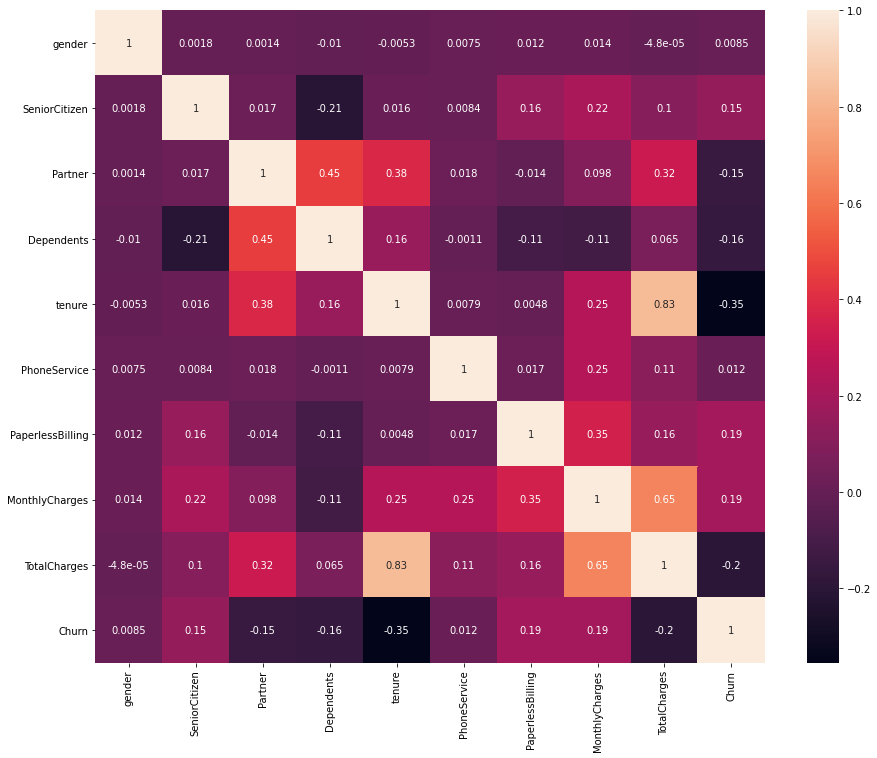

In [40]:
plt.figure(figsize = (15,12))
sns.heatmap(df2.corr(),annot = True )

## Train Test split

In [41]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=32)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (5625, 30) (5625,)
Test set: (1407, 30) (1407,)


In [42]:
y_train.value_counts()

0.0    4139
1.0    1486
Name: Churn, dtype: int64

**Oversampling**

In [43]:
smt = SMOTETomek(ratio='auto')
X_train_smt, y_train_smt = smt.fit_sample(X_train, y_train)

In [44]:
pd.Series(y_train_smt).value_counts()

0.0    3974
1.0    3974
dtype: int64

In [45]:
X_train_smt.shape, y_train_smt.shape

((7948, 30), (7948,))

## Model Building

### Logistic Regression

In [46]:
lr=LogisticRegression(random_state=0, solver='liblinear')
lr.fit(X_train_smt, y_train_smt)
pred_lr=lr.predict(X_test)
print("Logistic Regression:\n")
print("   F1 Score: ", f1_score(y_test, pred_lr))
print("   Accuracy: ", accuracy_score(y_test, pred_lr))

Logistic Regression:

   F1 Score:  0.6432264736297828
   Accuracy:  0.7547974413646056


### Support Vector Machine

In [47]:
svm=SVC(kernel='linear')
svm.fit(X_train_smt, y_train_smt)
pred_svm=svm.predict(X_test)
print("Support Vector Machine:\n")
print("   F1 Score: ", f1_score(y_test, pred_svm))
print("   Accuracy: ", accuracy_score(y_test, pred_svm))

Support Vector Machine:

   F1 Score:  0.6113886113886114
   Accuracy:  0.7235252309879175


### Naive Bayes

In [48]:
nb=GaussianNB()
nb.fit(X_train_smt, y_train_smt)
pred_nb=nb.predict(X_test)
print("Naive Bayes:\n")
print("   F1 Score: ", f1_score(y_test, pred_nb))
print("   Accuracy: ", accuracy_score(y_test, pred_nb))

Naive Bayes:

   F1 Score:  0.6055396370582617
   Accuracy:  0.7064676616915423


### Random Forest Classifier

In [49]:
rfc= RandomForestClassifier(n_estimators=100, random_state=0)
rfc.fit(X_train_smt, y_train_smt)
pred_rfc=rfc.predict(X_test)
print("Random Forest Classifier:\n")
print("   F1 Score: ", f1_score(y_test, pred_rfc))
print("   Accuracy: ", accuracy_score(y_test, pred_rfc))

Random Forest Classifier:

   F1 Score:  0.5664893617021276
   Accuracy:  0.7683013503909026


### XGBoost Classifier

In [50]:
X_test = X_test.to_numpy()

In [52]:
xgb= XGBClassifier()
xgb.fit(X_train_smt, y_train_smt)
pred_xgb=xgb.predict(X_test)
print("XGBoost Classifier:\n")
print("   F1 Score: ", f1_score(y_test, pred_xgb))
print("   Accuracy: ", accuracy_score(y_test, pred_xgb))

XGBoost Classifier:

   F1 Score:  0.6215235792019348
   Accuracy:  0.7775408670931059


***Note***: XGBoost model has outperformed all the previuos models.

In [53]:
print("XGBoost Classifier:\n")
print("\tClassification_report:\n")
print(classification_report(y_test, pred_xgb))

XGBoost Classifier:

	Classification_report:

              precision    recall  f1-score   support

         0.0       0.87      0.82      0.84      1024
         1.0       0.58      0.67      0.62       383

    accuracy                           0.78      1407
   macro avg       0.72      0.74      0.73      1407
weighted avg       0.79      0.78      0.78      1407

